# BULLKpy - TCGA RNAseq data
@mmm, January 23, 2026

<div style="font-size: 24px; line-height: 1.1; column-count: 2;">
Notebook Menu

<div style="font-size: 18px; line-height: 1.4; column-count: 2;">
<a href="#imports">1. Imports and settings</a><br>
<a href="#loads">2. Load original data into AnnData and BULLKpy object</a><br>
<a href="#pp">3. Quality control and Preprocessing</a><br>
<a href="#pca">4. PCA and Bidimensional Representation</a><br>
<a href="#clusters">5. Clustering and groups</a><br>
<a href="#genes">6. Genes and Gene Signatures</a><br>
<a href="#exploration">7. Data Exploration</a><br>
<a href="#correlations">8. Associations & Correlations</a><br>
<a href="#de">9. Markers and Differential Expression</a><br>
<a href="#go">10. Pathway and Gene Enrichment Analysis</a><br>
<a href="#mp">11. Metaprograms and Tumor Heterogeneity</a><br>
<a href="#plots">12. Additional Plots</a><br>
<a href="#utilities">13. Utilities Data</a><br>

# 1. Imports and settings
<a id="imports"></a>

## 1.1. Modules and Settings

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import anndata as ad
import bullkpy as bk

import gseapy as gspy
from gseapy import Msigdb
from gseapy import gseaplot
from gseapy import enrichment_map

In [2]:
import sys
sys.version
print("Python:", sys.version, "Numpy:", np.__version__, "Pandas:", pd.__version__, "Matplotlib:", mpl.__version__, "Seaborn:", sns.__version__, 
      "AnnData:", ad.__version__, "GSEApy:", gspy.__version__)

Python: 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ] Numpy: 1.23.5 Pandas: 2.3.3 Matplotlib: 3.8.0 Seaborn: 0.11.2 AnnData: 0.10.3 GSEApy: 1.1.0


In [3]:
bk.settings.verbosity = 3
bk.settings.plot_theme = "paper"      # "default" | "paper" | "talk"
bk.settings.plot_palette = "Set1"
bk.settings.plot_fontsize = 10        # optional
bk.settings.plot_dpi = 200
bk.settings.save_dpi = 300

# every plot calls set_style() internally, or you can call once:
bk.pl.set_style()
pal = sns.color_palette("husl", n_colors=35)       # palette for large categories
bk.settings.set_palette_for("Project_ID", where="obs", palette="husl")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="lifelines")

Change to paths with your files:

In [4]:
TCGA = "/Users/mmalumbres/Desktop/BioDATA/TCGA/"
DESKTOP = "/Users/mmalumbres/Desktop/"

# 2. Load data into AnnData and BULLKpy object
<a id="loads"></a>

Find details and additional parameters for all functions in:  
- https://bullkpy.readthedocs.io/en/latest/api/index.html  

## 2.1. Load expression data

TCGA data is available here:
- https://portal.gdc.cancer.gov/
- https://xenabrowser.net/datapages/

In [5]:
'GDC Pan-Cancer (PANCAN)/RNAseq/GDC-PANCAN.htseq_counts.tsv'
adata = bk.io.read_counts(TCGA + 'GDC Pan-Cancer (PANCAN)/RNAseq/GDC-PANCAN.htseq_counts.tsv', sep='\t', 
                  orientation='genes_by_samples', 
                  #dtype='int64'
                 )

INFO: Reading count matrix from /Users/mmalumbres/Desktop/BioDATA/TCGA/GDC Pan-Cancer (PANCAN)/RNAseq/GDC-PANCAN.htseq_counts.tsv
INFO: Raw matrix shape: (60488, 11057)
INFO: Interpreting rows as genes and columns as samples
INFO: Created AnnData object with 11057 samples ? 60488 genes


In [6]:
adata

AnnData object with n_obs × n_vars = 11057 × 60488

Check samples or metadata (if any)

In [7]:
adata.obs

""
TCGA-OR-A5JP-01A
TCGA-OR-A5JG-01A
TCGA-OR-A5K1-01A
TCGA-OR-A5JR-01A
TCGA-OR-A5KU-01A
...
TCGA-WC-A87T-01A
TCGA-WC-AA9A-01A
TCGA-V4-A9EA-01A
TCGA-RZ-AB0B-01A


Check expresion data

In [8]:
adata.X

array([[10,  2, 11, ...,  0,  0, 23],
       [10,  4, 11, ...,  0,  0, 24],
       [10,  1, 11, ...,  0,  0, 23],
       ...,
       [ 9,  0,  6, ...,  0,  0, 23],
       [ 9,  0, 10, ...,  0,  0, 23],
       [ 8,  0,  7, ...,  0,  0, 23]])

You can also use pandas or other python tools to read external data (counts, cpm, log-data etc.).  
See "Other tools" section at the end of the notebook.

## 2.2. Load metadata

Metadata store information relative to observations (Samples); e.g. tumor type; age of the patients, tumor purity, immune infiltration, survival, etc.  
Edit all your available data in an external table (excel, csv, tsv etc.)  
The "index_col" has be be identical to the listing of adata.obs above.

In [9]:
phenotype = '/GDC Pan-Cancer (PANCAN)/phenotype/GDC-PANCAN.TCGA_phenotype.tsv'
all_metadata = "260127_TCGA_metadata.tsv"

In [10]:
# Option 1 for easy metadata tables
adata = bk.add_metadata(adata, 
                        TCGA + all_metadata, 
                        low_memory=False, 
                        sep="\t",
                        index_col="sample",)

INFO: Adding metadata from /Users/mmalumbres/Desktop/BioDATA/TCGA/260127_TCGA_metadata.tsv
/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/MM01_BULLKpy/bullkpy-skeleton/src/bullkpy/io.py:128: DtypeWarning: Columns (32,290,511,556,561,562,565,628,673,705,706,707,708,711,712,715,716,723,724,725,731,771,822,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,939,941,947,948,950,951,952,953,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1

In [11]:
adata.obs.head(3)

,Sample_ID,Patient_ID,Project_ID,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,...,SLIT2_mut,MYC_mut,MYCL_mut,MYCN_mut,SOX2_mut,ASCL1_mut,NEUROD1_mut,POU2F3_mut,YAP1_mut,NE25_score
TCGA-OR-A5JP-01A,TCGA-OR-A5JP-01,TCGA-OR-A5JP,ACC,MALE,WHITE,Stage II,NaN,Adrenocortical carcinoma- Usual Type,NaN,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
TCGA-OR-A5JG-01A,TCGA-OR-A5JG-01,TCGA-OR-A5JG,ACC,MALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,2008.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
TCGA-OR-A5K1-01A,TCGA-OR-A5K1-01,TCGA-OR-A5K1,ACC,MALE,WHITE,Stage II,NaN,Adrenocortical carcinoma- Usual Type,NaN,2006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [12]:
adata

AnnData object with n_obs × n_vars = 11057 × 60488
    obs: 'Sample_ID', 'Patient_ID', 'Project_ID', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type', 'histological_grade', 'initial_pathologic_dx_year', 'menopause_status', 'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to', 'death_days_to', 'cause_of_death', 'new_tumor_event_type', 'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'treatment_outcome_first_course', 'margin_status', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'Subtype_mRNA', 'Subtype_DNAmeth', 'Subtype_protein', 'Subtype_miRNA', 'Subtype_CNA', 'Subtype_Integrative', 'Subtype_other', 'Subtype_Selected', 'sample_type_id', 'sample_type', '_primary_disease', 'Subtype_Immune_Model_Based', 'ICS5_score', 'LIexpression_score', 'Chemokine12_score', 'NHI_5gene_score', 'CD68', 'CD8A', 'PD1_data', 'PDL1_data', 'PD1_PDL1_score', 'CTLA4_data', 'Bcell_

Save AnnData object to your folder

In [51]:
adata.write("../data/h5ad/260127_TCGA_RNAseq_in_BULLKpy.h5ad", compression="gzip")

TypeError: Can't implicitly convert non-string objects to strings

In [ ]:
If you find problems writing to .h5ad or with the format of the columns go to the last section (Other Tools) in this notebook

# 3. Quality Control and preprocessing
<a id="pp"></a>

## 3.1. Compute QC

If counts:  
- `bk.pp.qc_metrics(adata, layer="counts")`  

If log data:  
- `bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)`  
will compute only n_genes_detected and warn about skipping count-based metrics

In [ ]:
If you are not sure about the format of the expression data:

In [17]:
#check data (non integers and low values -> log transformed data)

X = np.asarray(adata.X if not hasattr(adata.X, "A") else adata.X.A)
print("min/max:", X.min(), X.max())
print("fraction non-integers:", np.mean(np.abs(X - np.round(X)) > 1e-6))

min/max: 0.0 24.912
fraction non-integers: 0.5294770824749979


In [18]:
# Integer (counts) or log transformed?

X = adata.layers["counts"] if "counts" in adata.layers else adata.X
is_integerish = np.all(np.mod(np.asarray(X.todense() if hasattr(X,"todense") else X), 1) == 0)
print("integerish:", is_integerish)

integerish: False


In [12]:
# Integer (counts) or log transformed?
X = adata.layers["counts"] if "counts" in adata.layers else adata.X
bk.pp._is_integerish(X)

False

In [ ]:
# If counts, Save counts in a separata layer before normalization and log
### SKIP if data are already log-transformed
bk.pp.set_raw_counts(adata)      # layers["counts"]

In [19]:
#If your matrix is already log-transformed, store it in a layer and use that layer everywhere:
#If your code expects layer="log1p_cpm" everywhere, just alias it:
adata.layers["log1p_cpm"] = adata.X.copy()

In [24]:
# quick check
adata.layers["log1p_cpm"]

array([[0.7385, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 7.7539, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.6456, 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 7.5931, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 7.3647, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 6.8309, 0.    , 0.    ]])

In [20]:
bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)
# will compute only n_genes_detected and warn about skipping count-based metrics

INFO: QC metrics added to adata.obs (total_counts, n_genes_detected, pct_counts_mt where applicable).


## 3.2. Visual QC overview

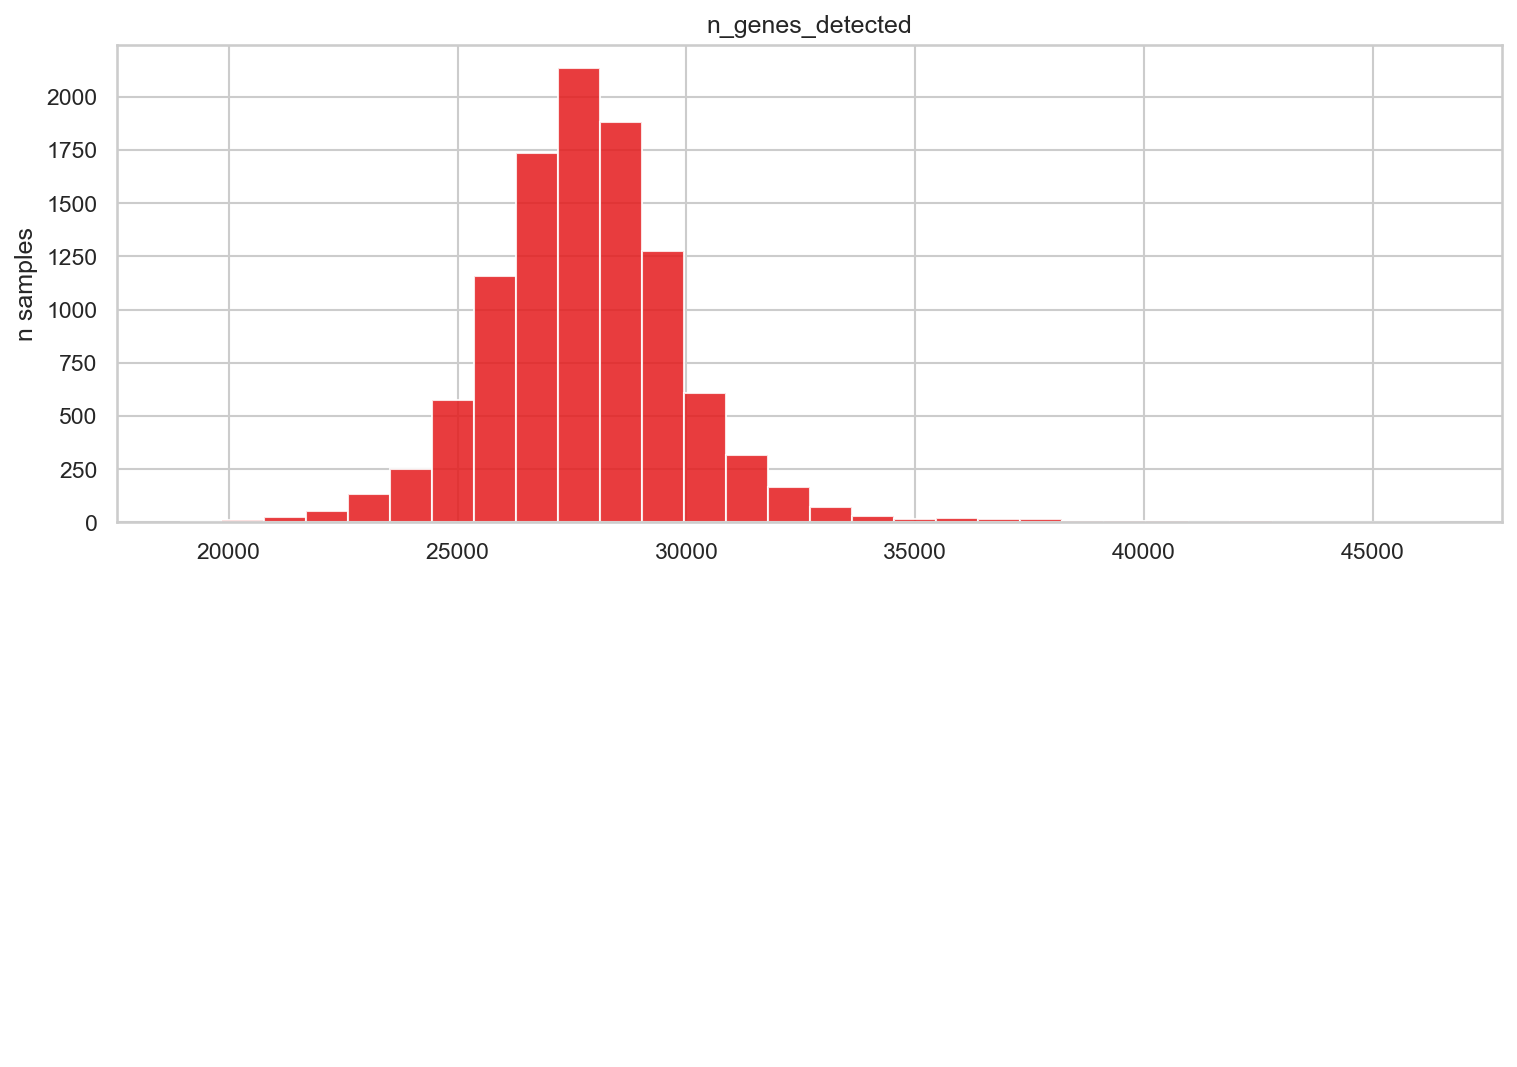

In [22]:
#If you only computed n_genes_detected
bk.pl.qc_metrics(
    adata,
    color="n_genes_detected",
    vars_to_plot=("n_genes_detected",)
);

### Filter out poor quality samples or genes

In [23]:
adata.obs[["n_genes_detected"]].describe()    #"total_counts", "pct_counts_mt"

,n_genes_detected
count,10534.000000
mean,27842.602810
std,2224.427676
min,18937.000000
25%,26529.000000
50%,27771.000000
75%,28991.750000
max,46458.000000


Filter out poor samples or genes
- If counts: use `layer="counts"`
- If normalized, `use layer="cpm"`
- If log-transformed, use `layer="log1p_cpm"`

In [53]:
# keep genes expressed in a minumum of X samples and with expression above a thershol
adata = bk.pp.filter_genes(adata, layer="log1p_cpm", min_samples=10, min_expr=0.1)

INFO: Filtering genes: layer='log1p_cpm', min_expr>0.1, min_samples=10 -> keep 52603/58581


In [54]:
# keep samples with a minimum of genes detected and minimum expression per gene
adata = bk.pp.filter_samples(adata, layer="log1p_cpm", min_genes=15000, expr_threshold_for_genes=0.1)

INFO: Filtering samples -> keep 10534/10535


In [55]:
# 4) Recompute QC after gene filtering (optional but nice)
bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)

INFO: QC metrics added to adata.obs (total_counts, n_genes_detected, pct_counts_mt where applicable).


### Normalize (skip is already normalized)

	•	layers["counts"] = raw integer counts
	•	layers["cpm"] = normalized
	•	layers["log1p_cpm"] = for PCA/plotting

### Log-transform (skip is already normalized and log-transformed)

In [16]:
# Open .h5ad file if previously stored
adata = ad.read_h5ad("../data/h5ad/251226_BULLKpy_TCGA_RNAseq.h5ad")

## 3.1. Compute QC

If counts:  
- `bk.pp.qc_metrics(adata, layer="counts")`  

If log data:  
- `bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)`  
will compute only n_genes_detected and warn about skipping count-based metrics

In [ ]:
If you are not sure about the format of the expression data:

In [17]:
#check data (non integers and low values -> log transformed data)

X = np.asarray(adata.X if not hasattr(adata.X, "A") else adata.X.A)
print("min/max:", X.min(), X.max())
print("fraction non-integers:", np.mean(np.abs(X - np.round(X)) > 1e-6))

min/max: 0.0 24.912
fraction non-integers: 0.5294770824749979


In [18]:
# Integer (counts) or log transformed?

X = adata.layers["counts"] if "counts" in adata.layers else adata.X
is_integerish = np.all(np.mod(np.asarray(X.todense() if hasattr(X,"todense") else X), 1) == 0)
print("integerish:", is_integerish)

integerish: False


In [12]:
# Integer (counts) or log transformed?
X = adata.layers["counts"] if "counts" in adata.layers else adata.X
bk.pp._is_integerish(X)

False

In [ ]:
# If counts, Save counts in a separata layer before normalization and log
### SKIP if data are already log-transformed
bk.pp.set_raw_counts(adata)      # layers["counts"]

In [19]:
#If your matrix is already log-transformed, store it in a layer and use that layer everywhere:
#If your code expects layer="log1p_cpm" everywhere, just alias it:
adata.layers["log1p_cpm"] = adata.X.copy()

In [24]:
# quick check
adata.layers["log1p_cpm"]

array([[0.7385, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 7.7539, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.6456, 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 7.5931, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 7.3647, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 6.8309, 0.    , 0.    ]])

In [20]:
bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)
# will compute only n_genes_detected and warn about skipping count-based metrics

INFO: QC metrics added to adata.obs (total_counts, n_genes_detected, pct_counts_mt where applicable).


## 3.2. Visual QC overview

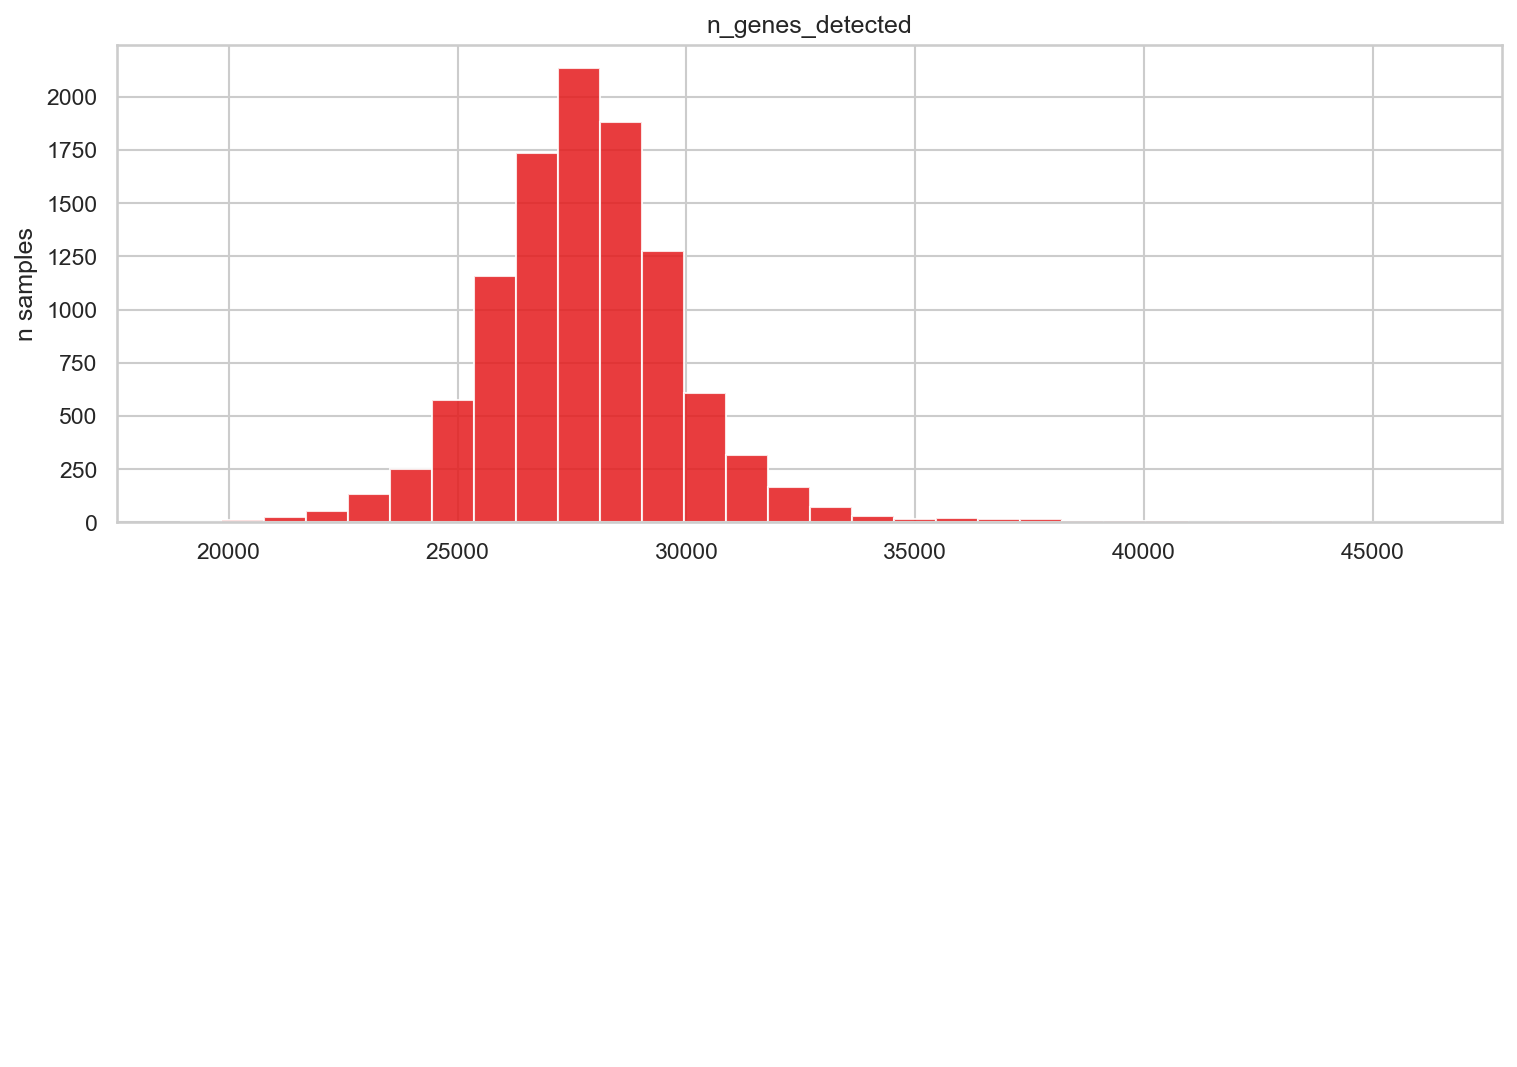

In [22]:
#If you only computed n_genes_detected
bk.pl.qc_metrics(
    adata,
    color="n_genes_detected",
    vars_to_plot=("n_genes_detected",)
);

### Filter out poor quality samples or genes

In [23]:
adata.obs[["n_genes_detected"]].describe()    #"total_counts", "pct_counts_mt"

,n_genes_detected
count,10534.000000
mean,27842.602810
std,2224.427676
min,18937.000000
25%,26529.000000
50%,27771.000000
75%,28991.750000
max,46458.000000


Filter out poor samples or genes
- If counts: use `layer="counts"`
- If normalized, `use layer="cpm"`
- If log-transformed, use `layer="log1p_cpm"`

In [53]:
# keep genes expressed in a minumum of X samples and with expression above a thershol
adata = bk.pp.filter_genes(adata, layer="log1p_cpm", min_samples=10, min_expr=0.1)

INFO: Filtering genes: layer='log1p_cpm', min_expr>0.1, min_samples=10 -> keep 52603/58581


In [54]:
# keep samples with a minimum of genes detected and minimum expression per gene
adata = bk.pp.filter_samples(adata, layer="log1p_cpm", min_genes=15000, expr_threshold_for_genes=0.1)

INFO: Filtering samples -> keep 10534/10535


In [55]:
# 4) Recompute QC after gene filtering (optional but nice)
bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)

INFO: QC metrics added to adata.obs (total_counts, n_genes_detected, pct_counts_mt where applicable).


### Normalize (skip is already normalized)

	•	layers["counts"] = raw integer counts
	•	layers["cpm"] = normalized
	•	layers["log1p_cpm"] = for PCA/plotting

### Log-transform (skip is already normalized and log-transformed)

# OTHER TOOLS

## Pandas for manipulating expression data and metadata

Set Sample ID as index using pandas and transpose the table

## Sanitize metadata

OPTIONAL.   
It is important that metadata columns are in the proper dtype (categories, numeric, text, etc.) for downstream studies. IF you get problems later with your metadata you can use this utilite below

In [12]:
bad, _ = bk.pp.find_bad_obs_cols_by_write(adata, n_rows=3000)
print("bad before:", len(bad), bad[:10])
print(" --------------------- ")

adata_safe, rep = bk.pp.make_obs_h5ad_safe_strict(adata, copy=True)
print(rep)
print(" --------------------- ")

bad2, _ = bk.pp.find_bad_obs_cols_by_write(adata_safe, n_rows=3000)
print("bad after:", len(bad2), bad2[:10])

bad before: 65 [('samples.is_ffpe', "Can't implicitly convert non-string objects to strings"), ('days_to_new_tumor_event_after_initial_treatment', "Can't implicitly convert non-string objects to strings"), ('pct_tumor_invasion', "Can't implicitly convert non-string objects to strings"), ('total_pelv_lnp', "Can't implicitly convert non-string objects to strings"), ('total_pelv_lnr', "Can't implicitly convert non-string objects to strings"), ('total_aor_lnr', "Can't implicitly convert non-string objects to strings"), ('neoplasm_length', "Can't implicitly convert non-string objects to strings"), ('days_to_submitted_specimen_dx', "Can't implicitly convert non-string objects to strings"), ('laboratory_procedure_prothrombin_time_result_value', "Can't implicitly convert non-string objects to strings"), ('laboratory_procedure_creatinine_result_lower_limit_of_normal_value', "Can't implicitly convert non-string objects to strings")]
 --------------------- 
{'numeric_coerced': ['samples.is_ffpe',

re-test if necessary

In [48]:
bad2, _ = bk.pp.find_bad_obs_cols_by_write(adata_safe, n_rows=3000)
print("bad after:", len(bad2), bad2[:10])

bad after: 0 []


If bad = 0

In [13]:
adata = adata_safe.copy()

In [15]:
adata.write("../data/h5ad/260127_TCGA_RNAseq_in_BULLKpy.h5ad", compression="gzip")

In [ ]:
Identify bad columns if necessary

In [13]:
bad = bk.pp.find_bad_obs_cols_by_write(adata, n_rows=800)
bad_cols = [c for c, msg in bad if not c.startswith("<")]
print("Bad columns:", bad_cols)

bk.pp.make_obs_h5ad_safe(adata, columns=bad_cols, fix_index=True)

Bad columns: ['GP1_Proliferation/DNA_repair', 'GP2_Immune-Tcell/Bcell', 'GP4_MES/ECM', 'GP5_MYC_targets/TERT', 'GP6_Squamous_differentiation/development', 'GP8_FOXO/stemness', 'GP11_Immune-IFN_GP12_Hypoxia/glycolosis', 'GP18_Vesicle/EPR_membrane_coat', 'GP20_TAL1-Leukemia/erythropoiesis', 'GP21_Anti-apoptosis/DNA_stability', 'samples.is_ffpe', 'days_to_new_tumor_event_after_initial_treatment', 'total_pelv_lnr', 'total_aor_lnr', 'neoplasm_length', 'days_to_submitted_specimen_dx', 'days_to_definitive_surgical_procedure_performed', 'hematology_serum_creatinine_laboratory_result_value_in_mg_dl', 'laboratory_procedure_total_bilirubin_result_specified_upper_limit_of_normal_value', 'number_of_successful_pregnancies_which_resulted_in_at_least_1_live_birth', 'total_number_of_pregnancies', 'maximum_tumor_dimension', 'days_to_pre_orchi_serum_test', 'post_orchi_ldh', 'pre_orchi_afp', 'pre_orchi_hcg', 'pre_orchi_ldh', 'days_to_post_orchi_serum_test', 'post_orchi_afp', 'histological_percentage', 'mi